Tutorial Keras:
https://elitedatascience.com/keras-tutorial-deep-learning-in-python

In [12]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

Load data from MNIST

In [13]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print X_train.shape
print X_test.shape

(60000, 28, 28)
(10000, 28, 28)


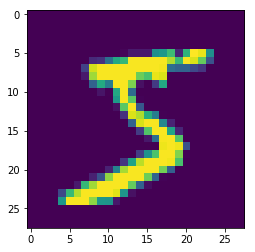

In [14]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.imshow(X_train[0])

In [15]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
print X_train.shape
print X_test.shape

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [16]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [17]:
print type(X_train)
print X_train.dtype

<type 'numpy.ndarray'>
float32


In [18]:
print y_train.shape

(60000,)


(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

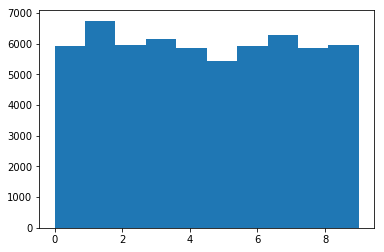

In [38]:
plt.hist(y_train)

We create categorical variables from the integers:

In [9]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print Y_train.shape
print Y_test.shape

(60000, 10)
(10000, 10)


Now we define the model for our CNN

In [40]:
model = Sequential()

model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [41]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [43]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 139s 2ms/step - loss: 0.1432 - acc: 0.9574
Epoch 2/10
60000/60000 [==============================] - 168s 3ms/step - loss: 0.0822 - acc: 0.9752
Epoch 3/10
60000/60000 [==============================] - 199s 3ms/step - loss: 0.0643 - acc: 0.9804
Epoch 4/10
60000/60000 [==============================] - 133s 2ms/step - loss: 0.0523 - acc: 0.9843
Epoch 5/10
60000/60000 [==============================] - 128s 2ms/step - loss: 0.0449 - acc: 0.9867
Epoch 6/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0410 - acc: 0.9872
Epoch 7/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0344 - acc: 0.9892
Epoch 8/10
60000/60000 [==============================] - 119s 2ms/step - loss: 0.0334 - acc: 0.9899
Epoch 9/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0296 - acc: 0.9908
Epoch 10/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0271 - a

In [51]:
score = model.evaluate(X_test, Y_test)

10000/10000 [==============================] - 5s 495us/step


In [52]:
score

[0.023942233699698546, 0.9935]

Save model to disk

In [46]:
model_yaml = model.to_yaml()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


Import model from disk

In [1]:
from keras.models import model_from_yaml
yaml_file = open('model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_yaml(loaded_model_yaml)

loaded_model.load_weights("model.h5")

Using TensorFlow backend.


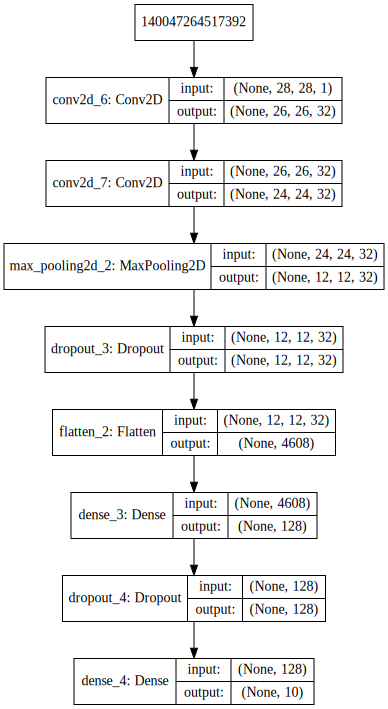

In [5]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot


SVG(model_to_dot(loaded_model,show_shapes=True).create(prog='dot', format='svg'))

We can make predictions with this model:

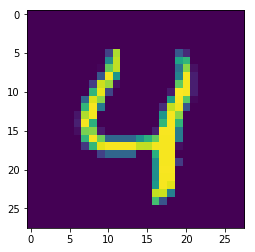

In [31]:
plt.imshow(X_test[4][:][:].reshape(28,28))

In [32]:
print(loaded_model.predict(X_test[4].reshape(1,28,28,1)))
print(loaded_model.predict_classes(X_test[4].reshape(1,28,28,1)))

[[2.4679247e-13 8.1168275e-12 3.2529374e-12 3.9116781e-16 9.9999905e-01
  6.9903801e-12 3.2688675e-11 1.0200692e-10 1.0425897e-10 9.4300327e-07]]
[4]
